**Scenarion**

A company operating in the retail food sector. Presently they have around several hundred thousands of registered customers and serve almost one million consumers a year. They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially prepared fish and sweet products. These can further be divided into gold and regular products. The customers can order and acquire products through 3 sales channels: physical stores, catalogs and company’s website. The profit growth perspectives for the next 3 years are not promising... For this reason, several strategic initiatives are being considered to invert this situation with a special focus on marketing campaigns.

The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled.

**Objective**

The CMO is interested in understanding to study the characteristic features of those customers who are willing to buy the gadget.

**Key Objective**

Explore the data – You need to provide the marketing team a better understanding of the characteristic features of respondents



In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing csv file

df = pd.read_csv("D:\\tuitorials\\Portfolio projects\\Excel projects\\marketing_data.csv")

In [3]:
# top 5 rows

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


year_birth and country column are not needed

In [4]:
# number of values in data
df.size

62720

In [5]:
#number of customers

df.shape

(2240, 28)

There are 2240 customers exposed to pilot campaign

In [6]:
#data types and nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* income variable has nulls
* data type of the date a customer enrolled with company (Dt_customer) is object instead of datetime
* Column name 'Income' have extra spaces

In [7]:
#columns in the data frame

print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [8]:
#renaming 'income' column

df.rename(columns={' Income ':'Income'}, inplace=True)
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [9]:
#descriptive statistics of numeric data

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#total number of nulls in columns

df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

income of 24 respondents are not known

In [11]:
#filtering dataframe to get respondents with null values

df[df.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,Germany
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,USA
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,Australia
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,Australia
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,Canada
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,Germany
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,USA
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,Germany
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,Australia
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,Australia


In [12]:
#Impute missing values with median value to retain the sample size and recheck for null values

df['Income'] = df['Income'].fillna(df['Income'].median())
df['Income'].isna().sum()

0

In [13]:
#converting object data type to datetime and validating 

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [14]:
# validating data types, nulls, and column names formats

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [83]:
#checking for duplicates

df.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [16]:
#dropping columns that are additional 

df = df.drop(columns=['Year_Birth','Country'])
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,4,6,1,0,0,0,0,0,1,0
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,3,7,5,0,0,0,0,1,1,0
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,5,2,0,0,0,0,0,0,0
3,1386,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,1,2,7,1,0,0,0,0,1,0


**Adding columns that might be used later**

In [17]:
# adding new column 'Tenure' 

df['Tenure'] = 2023 - df['Dt_Customer'].dt.year
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Tenure
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,6,1,0,0,0,0,0,1,0,9
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,7,5,0,0,0,0,1,1,0,9
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,5,2,0,0,0,0,0,0,0,9
3,1386,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,2,7,0,0,0,0,0,0,0,9
4,5371,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,2,7,1,0,0,0,0,1,0,9


In [18]:
#adding new column 'customer loyalty'

df['Customer loyalty'] = pd.qcut(df['Recency'],3,labels=['loyal','inactive','non-loyal'])
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Tenure,Customer loyalty
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,1,0,0,0,0,0,1,0,9,loyal
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,5,0,0,0,0,1,1,0,9,loyal
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,0,0,0,0,0,0,0,9,loyal
3,1386,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,7,0,0,0,0,0,0,0,9,loyal
4,5371,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,7,1,0,0,0,0,1,0,9,loyal


In [19]:
# adding new column 'revenue'

df['Revenue'] = df['MntGoldProds']+df['MntWines']+df['MntFruits']+df['MntFishProducts']+df['MntMeatProducts']+df['MntSweetProducts']
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Tenure,Customer loyalty,Revenue
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,0,0,0,0,0,1,0,9,loyal,1190
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,0,0,0,1,1,0,9,loyal,577
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,0,0,0,0,0,0,0,9,loyal,251
3,1386,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,0,0,0,0,0,0,0,9,loyal,11
4,5371,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,1,0,0,0,0,1,0,9,loyal,91


In [20]:
#adding new column 'income groups'

df['Income group'] = pd.qcut(df['Income'],3,labels=['High','medium','low'])
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Tenure,Customer loyalty,Revenue,Income group
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,0,0,0,0,1,0,9,loyal,1190,low
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,0,0,1,1,0,9,loyal,577,medium
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,0,0,0,0,0,0,9,loyal,251,low
3,1386,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,0,0,0,0,0,0,9,loyal,11,High
4,5371,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,0,0,0,0,1,0,9,loyal,91,High


In [21]:
#filtering to get loyal customers and corresponding recency

loyalty = df[['Recency','Customer loyalty']]
loyalty[loyalty['Customer loyalty'] == 'loyal'].sort_values(by=['Recency'], ascending=False)

,Recency,Customer loyalty
762,32,loyal
752,32,loyal
742,32,loyal
743,32,loyal
744,32,loyal
...,...,...
24,0,loyal
25,0,loyal
26,0,loyal
27,0,loyal


763 customers out of 2240 are loyal customers, they have ~ 1 month since the last purchase

Since the company will launch the sixth campaign to customers that showed willingness to purchase (Response=1), then the data will be filtered to customers with willingness and analyze them to know their charactericts. The new data frame will be named **'Response'**

In [22]:
Response = df[df['Response'] == 1]
Response

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Tenure,Customer loyalty,Revenue,Income group
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,0,0,0,0,1,0,9,loyal,1190,low
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,0,0,1,1,0,9,loyal,577,medium
4,5371,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,0,0,0,0,1,0,9,loyal,91,High
5,7348,PhD,Single,71691.0,0,0,2014-03-17,0,336,130,...,0,0,0,0,1,0,9,loyal,1192,low
6,4073,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,80,...,0,0,0,0,1,0,9,loyal,1215,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,5153,PhD,Married,77766.0,0,1,2013-02-22,97,1004,59,...,0,0,0,0,1,0,10,non-loyal,1529,low
2196,4127,PhD,Married,77766.0,0,1,2013-02-22,97,1004,59,...,0,0,0,0,1,0,10,non-loyal,1529,low
2212,3979,PhD,Divorced,90687.0,0,0,2013-05-22,98,982,17,...,0,1,0,0,1,0,10,non-loyal,1779,low
2216,7230,PhD,Divorced,50611.0,0,1,2012-10-04,98,459,0,...,1,0,0,0,1,0,11,non-loyal,493,medium


334 customers out of 2240 are willing to buy the gadget

In [23]:
# descriptive statistics

Response.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Tenure,Revenue
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0,334.000000,334.000000,334.000000
mean,5421.820359,60183.244012,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,38.634731,...,5.293413,0.230539,0.185629,0.275449,0.236527,0.059880,1.0,0.008982,10.251497,987.392216
std,3154.132439,23164.266112,0.487347,0.492741,27.659499,427.183786,46.099519,286.890036,61.855885,46.327903,...,2.569891,0.421810,0.389390,0.447411,0.425587,0.237621,0.0,0.094489,0.690724,719.009695
min,1.000000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,9.000000,17.000000
25%,2785.250000,39786.750000,0.000000,0.000000,11.000000,96.000000,4.000000,47.750000,4.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,10.000000,252.000000
50%,5133.000000,64044.000000,0.000000,0.000000,30.000000,448.000000,21.000000,174.500000,25.000000,20.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,10.000000,1057.500000
75%,8127.750000,80477.000000,1.000000,1.000000,56.000000,875.500000,53.750000,509.750000,84.250000,57.000000,...,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,11.000000,1617.000000
max,11133.000000,105471.000000,2.000000,2.000000,99.000000,1492.000000,193.000000,981.000000,250.000000,198.000000,...,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,11.000000,2525.000000


**Education level**

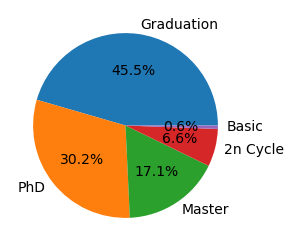

In [64]:
plt.figure(figsize=(3,3))
data=Response['Education'].value_counts()
labels=['Graduation','PhD','Master','2n Cycle','Basic']
plt.pie(data, autopct='%1.1f%%',labels=labels)
plt.show()

92.8% have a degree or more, only 7.2% don't have degree 

**Marital Status**

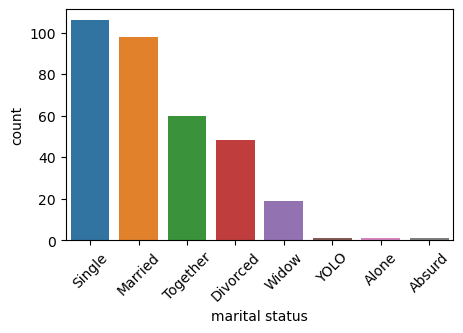

In [77]:
plt.figure(figsize=(5,3))
marital_data=Response['Marital_Status'].value_counts()
labels=['Single','Married','Together','Divorced','Widow','YOLO','Alone','Absurd']
sns.barplot(x=labels,y=marital_data)
plt.xticks(rotation=45)
plt.xlabel('marital status')
plt.ylabel('count')
plt.show()

Majority are single followed by married

**Income levels**

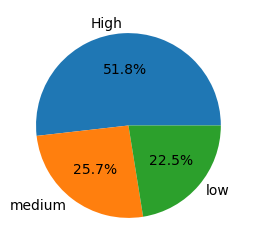

In [78]:
plt.figure(figsize=(3,3))
income_data=Response['Income group'].value_counts()
labels=['High','medium','low']
plt.pie(income_data, autopct='%1.1f%%',labels=labels)
plt.show()

51.8% have high annual income, therefore they have economic potential to purchase products

**Recency**

days since the last purchase

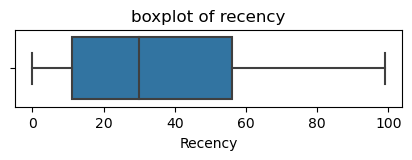

In [24]:
plt.figure(figsize=(5,1))
sns.boxplot(x=Response['Recency'], fliersize=1)
plt.title('boxplot of recency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

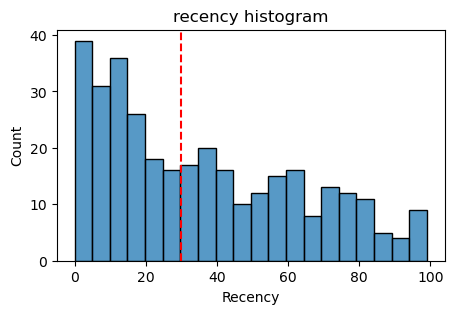

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(x=Response['Recency'], bins=20)
plt.axvline(x=Response['Recency'].median(),color='r',linestyle='--')
plt.title('recency histogram')
plt.show

Many of the customers have 30 days or fewer since the last purchase but also there are few customers who have more than 3 months haven't made a purchase. The willing customers are loyal customers

**Amount spent on 6 products in the last 2 years**

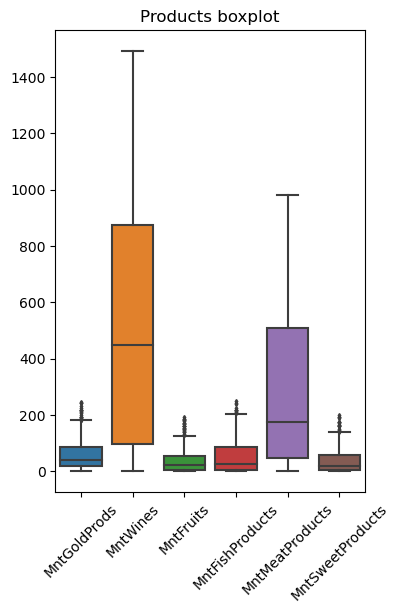

In [27]:
plt.figure(figsize=(4,6))
sns.boxplot(data=Response[['MntGoldProds','MntWines','MntFruits','MntFishProducts','MntMeatProducts','MntSweetProducts']], fliersize=2)
plt.title('Products boxplot')
plt.xticks(rotation=45)
plt.show()

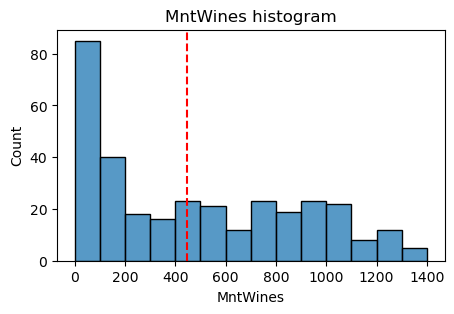

In [28]:
plt.figure(figsize=(5,3))
sns.histplot(x=Response['MntWines'], bins=range(0,1500,100))
plt.axvline(x=Response['MntWines'].median(),color='r',linestyle='--')
plt.title('Wines histogram')
plt.show()

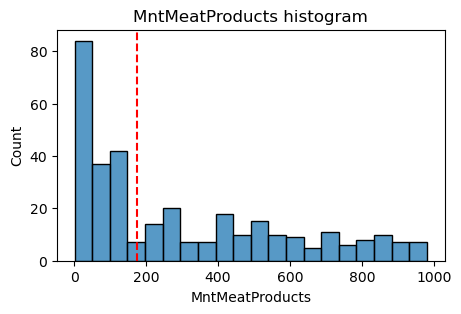

In [29]:
plt.figure(figsize=(5,3))
sns.histplot(x=Response['MntMeatProducts'], bins=20)
plt.axvline(x=Response['MntMeatProducts'].median(),color='r',linestyle='--')
plt.title('Meat Products histogram')
plt.show()

customers spent more on wines and meat products compared to other products, half of the customers have median of 448 and 174.5 or below respectively

**Channel Performances**

*number of purchases made through catalog, direct from store, and through company website*

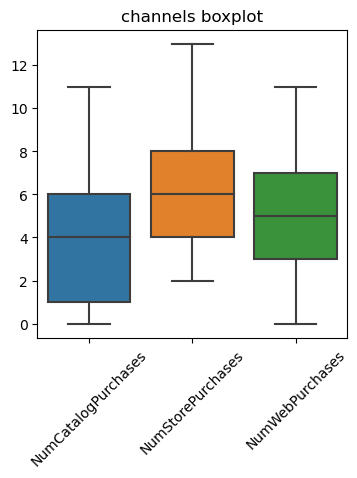

In [87]:
plt.figure(figsize=(4,4))
sns.boxplot(data=Response[['NumCatalogPurchases','NumStorePurchases','NumWebPurchases']], fliersize=3)
plt.title('channels boxplot')
plt.xticks(rotation=45)
plt.show()

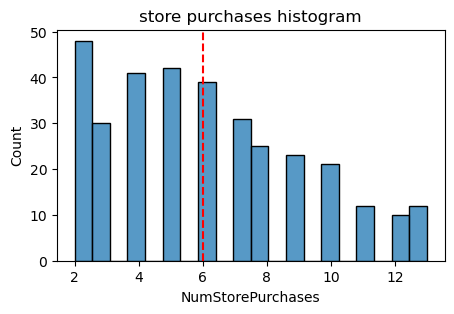

In [32]:
plt.figure(figsize=(5,3))
sns.histplot(x=Response['NumStorePurchases'], bins=20)
plt.axvline(x=Response['NumStorePurchases'].median(),color='r',linestyle='--')
plt.title('store purchases histogram')
plt.show()

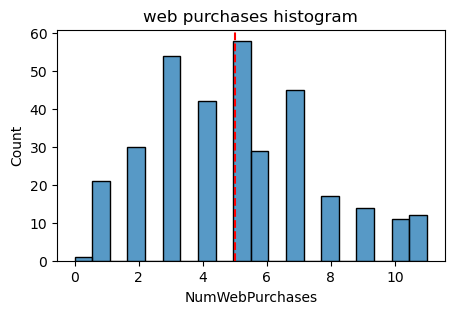

In [33]:
plt.figure(figsize=(5,3))
sns.histplot(x=Response['NumWebPurchases'], bins=20)
plt.axvline(x=Response['NumWebPurchases'].median(),color='r',linestyle='--')
plt.title('web purchases histogram')
plt.show()

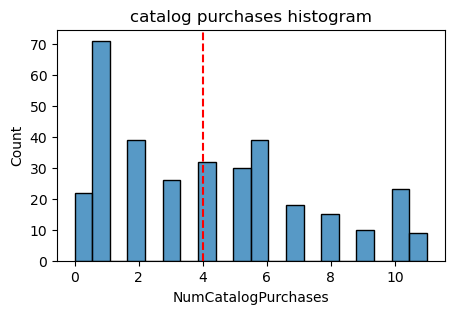

In [88]:
plt.figure(figsize=(5,3))
sns.histplot(x=Response['NumCatalogPurchases'], bins=20)
plt.axvline(x=Response['NumCatalogPurchases'].median(),color='r',linestyle='--')
plt.title('catalog purchases histogram')
plt.show()

Many customers prefer direct purchase from store with median of 6. Every customer has made atleast 2 or more purchases directly from the store. In other channels, there are customers who haven't made a purchase via website or catalog. 

**Number of purchases made with discount**

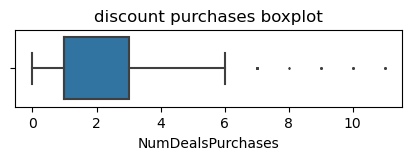

In [38]:
plt.figure(figsize=(5,1))
sns.boxplot(x=Response['NumDealsPurchases'], fliersize=1)
plt.title('discount purchases boxplot')
plt.show()

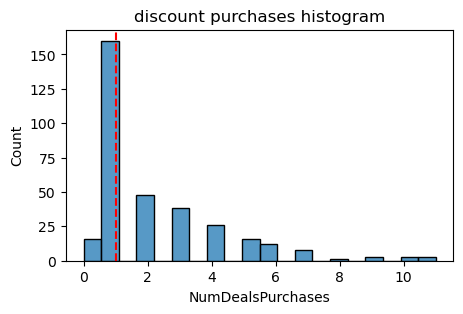

In [39]:
plt.figure(figsize=(5,3))
sns.histplot(x=Response['NumDealsPurchases'], bins=20)
plt.axvline(x=Response['NumDealsPurchases'].median(),color='r',linestyle='--')
plt.title('discount purchases histogram')
plt.show()

In [40]:
#median number of purchases with discount

Response['NumDealsPurchases'].median()

1.0

Many of the customers made 1 purchase or not at all with discount, this means that the discount doesn't increase number of purchases. Maybe the discount % is not reasonable. Very few customers made more than 10 purchases with discount 

**Performance of the last 4 campaigns**

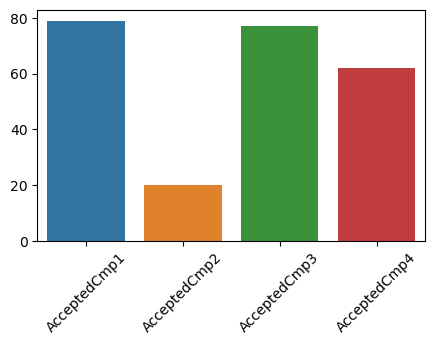

In [36]:
plt.figure(figsize=(5,3))
sns.barplot(data=Response[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4']], estimator=sum,ci=None)
plt.xticks(rotation=45)
plt.show()

campaign number 2 had bad performance, more research can be done to know the reasons

**Relationship between income and amount spent on products**

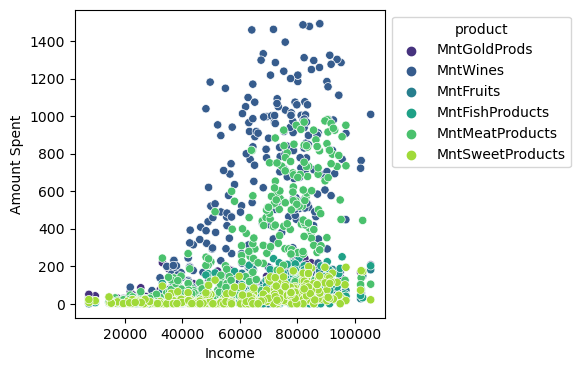

In [46]:
correlation = Response[['Income','MntGoldProds','MntWines','MntFruits','MntFishProducts','MntMeatProducts','MntSweetProducts']]
correlation_melted = pd.melt(correlation, id_vars=['Income'], var_name='Product', value_name='Amount Spent')
plt.figure(figsize=(4,4))
sns.scatterplot(x='Income',y='Amount Spent',hue='Product',data=correlation_melted,palette='viridis')
plt.xlabel('Income')
plt.ylabel('Amount Spent')
plt.legend(title='product', bbox_to_anchor=(1,1))
plt.show()

There is positive relationship between income and amount spent, the more your annual income increases the more you will spend on products

**Conclusion**

* Customers that are willing to buy the new product are loyal high earning customers
* They mostly prefer to buy wines and meat products directly from the store
* They have high educational level (degree to phD)
* Most of them are single and married
* There income affects positively their spending behaviour 
* Discount doesn't influence there purchasing